In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
data=pd.read_csv("train.csv")
#data.describe(include="all")
#data[data.isnull().any(axis=1)]
data_t=pd.read_csv("test.csv")
data_ty=pd.read_csv("submission_example.csv")
y_test=data_ty.drop("ID",axis=1)
data_t["medv"]=y_test
#data_t.shape

In [108]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=pd.DataFrame(scaler.fit_transform(data))
#data=pd.DataFrame(data,columns=["ID","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"])
data.columns=["ID","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"]
#data.describe(include="all")

data_t=pd.DataFrame(scaler.fit_transform(data_t))
data_t.columns=["ID","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"]


In [124]:
x=data.drop("medv",axis=1)
x_train=x.drop("ID",axis=1)
y_train=data["medv"]


x_test=data_t.drop("ID",axis=1)
x_test=x_test.drop("medv",axis=1)
y_test=data_t["medv"]


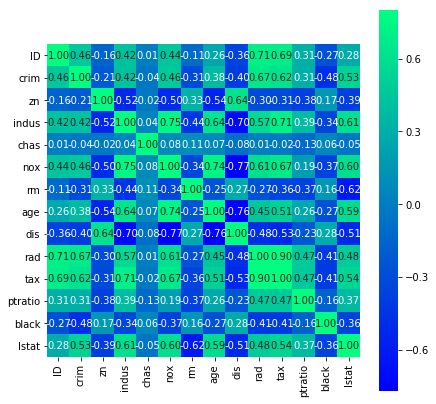

In [110]:
#correlation between features
import seaborn as sns
corrmat=x.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,fmt=".2f",cmap="winter")

In [126]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13,whiten=True)
x_pca=pd.DataFrame(pca.fit_transform(x_train))
#x_pca.columns=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]
pca.explained_variance_ratio_

array([0.4758218 , 0.10989178, 0.09186075, 0.068342  , 0.06344551,
       0.05121048, 0.03641462, 0.03195445, 0.02072343, 0.01831644,
       0.013866  , 0.01303419, 0.00511853])

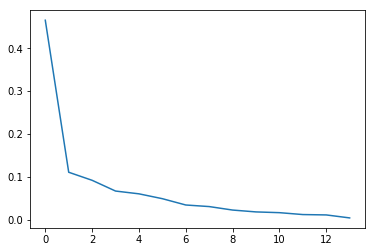

In [112]:
plt.plot(pca.explained_variance_ratio_)

In [127]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0)
lasso_model.fit(x_pca,y_train)

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
lasso_model.score(x_pca,y_train)

0.7331394355527803

In [129]:
#important features 
predictors=x_pca.columns
weight=pd.Series(lasso_model.coef_,predictors).sort_values()
print(weight)

0    -0.600634
4    -0.289738
1    -0.288139
7    -0.115191
11   -0.108577
12   -0.101962
5    -0.065863
10    0.020027
6     0.023853
3     0.039790
8     0.090077
9     0.103876
2     0.382576
dtype: float64


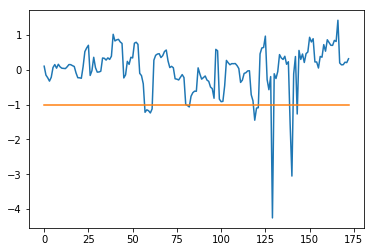

In [130]:

y_predict=lasso_model.predict(x_test)
plt.plot(y_predict)
plt.plot(y_test)

In [132]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_predict,y_test)
print(mse)
import math
rmse=math.sqrt(mse)
rmse

1.4598883955407957


1.2082584142230484

In [133]:
print("project completed")

project completed
